In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
last_date_entry = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date_entry)

('2017-08-23',)


In [14]:
# last 12 months of data is the last date - 365
last_12_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_12_months)

2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
water_precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_12_months).\
    order_by(Measurement.date).all()

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
water_precip_df = pd.DataFrame(water_precip)
water_precip_df.set_index('date').head(3)

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [22]:
# Sort the dataframe by date (newest to oldest)
water_precip_df.sort_values(by='date', ascending = False).head(10)

,date,prcp
2222,2017-08-23,0.45
2221,2017-08-23,0.08
2220,2017-08-23,0.00
2219,2017-08-23,0.00
2218,2017-08-22,0.50
2217,2017-08-22,0.00
2216,2017-08-22,0.00
2215,2017-08-21,0.56
2214,2017-08-21,NaN
2213,2017-08-21,0.02


<IPython.core.display.Javascript object>


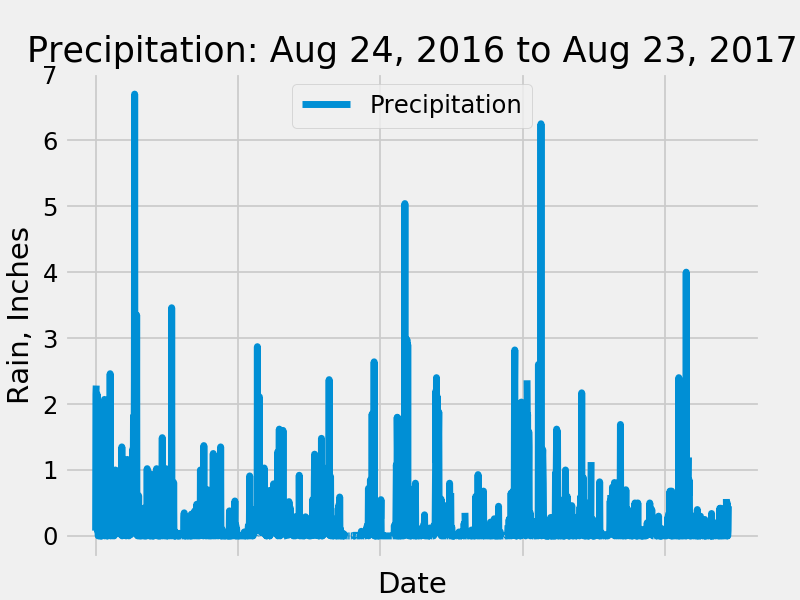

In [26]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
water_precip_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain, Inches")
plt.title("Precipitation: Aug 24, 2016 to Aug 23, 2017")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
water_precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
# How many stations are available in this dataset?
num_stations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations in this dataset.".format(num_stations))

There are 9 stations in this dataset.


In [29]:
# What are the most active stations?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
print("the most active stations are:")
for station, count in active_stations:
    print("Station no.",station,"had",count, "weather records.")

the most active stations are:
Station no. USC00519281 had 2772 weather records.
Station no. USC00519397 had 2724 weather records.
Station no. USC00513117 had 2709 weather records.
Station no. USC00519523 had 2669 weather records.
Station no. USC00516128 had 2612 weather records.
Station no. USC00514830 had 2202 weather records.
Station no. USC00511918 had 1979 weather records.
Station no. USC00517948 had 1372 weather records.
Station no. USC00518838 had 511 weather records.


In [48]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# lowest_temps_of_most_active_station = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
#    filter(Measurement.station == active_stations[0][0]).\
#    filter(Measurement.date > last_12_months).\
#    order_by(Measurement.tobs).all()
# print('The lowest recorded temp was ' + str(lowest_temps_of_most_active_station[0][2]) + '.')
q = session.query(Station.id,
                  Station.name,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
.filter(Measurement.station == Station.station)\
.filter(Measurement.station == "USC00519281")
avg_tmp_rec = "{0:.1f}".format(q[0][4])
print(f"Most Active Station ID: {q[0][0]}, \
    Station Name: {active_stations[0][0]},\
    Station Location: {q[0][1]} \nResults: \n    Minimum temperature recorded:  {q[0][2]}\n\
    Maximum temperture recorded :  {q[0][3]}\n    Average temperature recorded:  {avg_tmp_rec}")

Most Active Station ID: 7,     Station Name: USC00519281,    Station Location: WAIHEE 837.5, HI US 
Results: 
    Minimum temperature recorded:  54.0
    Maximum temperture recorded :  85.0
    Average temperature recorded:  71.7


In [45]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_twelve_mo = session.query(Measurement.tobs)\
    .filter(Measurement.date > last_12_months)\
    .filter(Measurement.station == active_stations[0][0])\
    .order_by(Measurement.tobs).all()
    
for row in most_active_station_twelve_mo:
    print(row)

(59.0,)
(59.0,)
(59.0,)
(60.0,)
(60.0,)
(61.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(63.0,)
(63.0,)
(63.0,)
(63.0,)
(64.0,)
(64.0,)
(64.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)


In [46]:
most_active_station_twelve_mo_df = pd.DataFrame(most_active_station_twelve_mo, columns=['temp'])
most_active_station_twelve_mo_df.head()

,temp
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


<IPython.core.display.Javascript object>


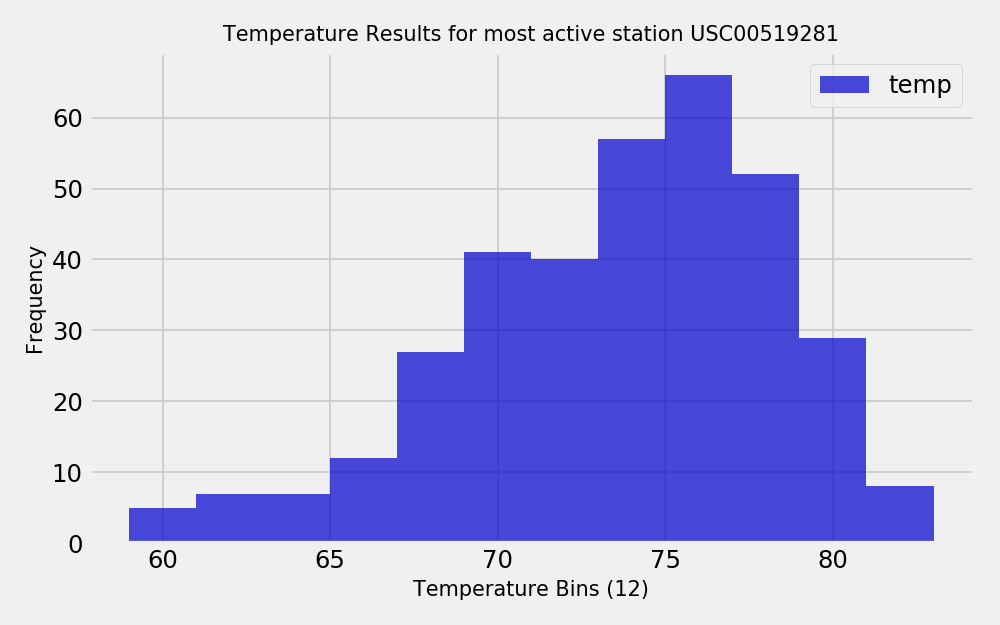

In [47]:
# Plot Temperature Results for Most Active Station
plt.subplots(figsize=(8,5))

plt.hist(most_active_station_twelve_mo_df['temp'], bins=12, color="mediumblue", alpha=.7)
plt.title(f"Temperature Results for most active station USC00519281",fontsize=12)
plt.xlabel('Temperature Bins (12)', fontsize=12)
plt.ylabel("Frequency", fontsize=12)
labels = ['temp']
plt.legend(labels)
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
# plt.savefig('temp_histogram.png')
plt.show()

In [49]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [51]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# print(calc_temps('2011-02-28', '2011-03-05'))
start_date = '2012-02-28'
end_date = '2012-03-05'
date_range = start_date + ' - ' + end_date
tmin,tavg,tmax = calc_temps(start_date, end_date)[0]
tavg_df=pd.DataFrame([tavg],columns=['tavg'],index=[date_range])

<IPython.core.display.Javascript object>


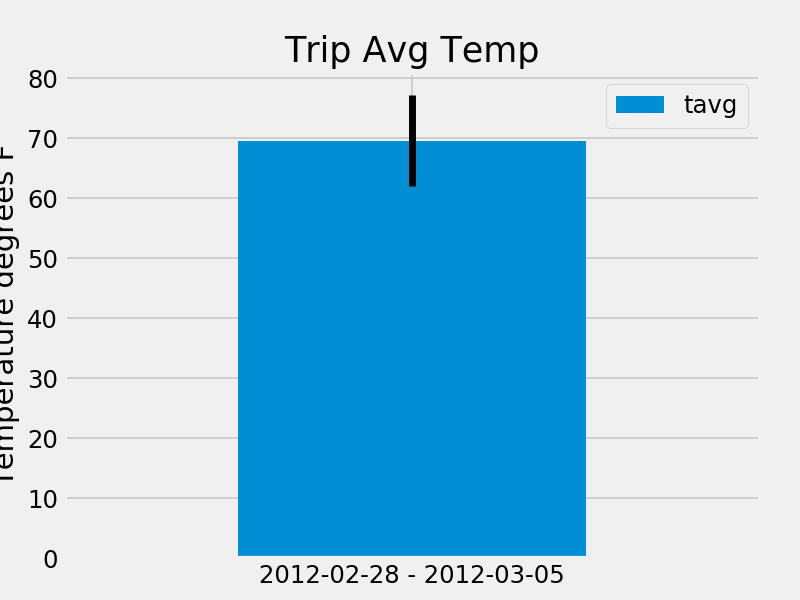

In [52]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tavg_df.plot(kind='bar',yerr=[[tavg-tmin],[tmax-tavg]])
plt.xticks(rotation='horizontal')
plt.ylabel('Temperature degrees F')
plt.title('Trip Avg Temp')
plt.show()

In [65]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
prev_start_date = '2011-02-28'
prev_end_date = '2011-03-05'
last_year_rainfall = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date >= prev_start_date).\
    filter(Measurement.date <= prev_end_date).\
    order_by(Measurement.station).all()
last_year_rainfall_df = pd.DataFrame(last_year_rainfall)
rainfall_per_station = pd.pivot_table(last_year_rainfall_df, index=['station'],values=['prcp'], aggfunc=sum)
rainfall_per_station.sort_values(by='prcp', ascending=False)

,prcp
station,
USC00518838,2.33
USC00519281,2.23
USC00519523,2.19
USC00514830,1.96
USC00516128,1.45
USC00513117,1.44
USC00519397,1.38
USC00511918,0.63
USC00517948,0.00


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
